<div style="text-align: center; font-size: 36px; font-weight: bold; color: #2E86C1;">Introduction to Data Science - Final Assignment</div>
<div style="text-align: center; font-size: 25px; font-weight: bold; color: #2E86C1;">PART C - Word Embedding</div>
<div style="text-align: center; font-size: 20px; color: #555;">Group 005 | Eran Tascesme - 205708720 | David Perelman 206467870</div>

<div style="color: #D35400; font-size: 15px;"> 🔽 Import Libraries</div>

In [43]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
import scipy.sparse
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">1️⃣ <b>Loading and Splitting the data</b></div>

<div style="color: #D35400; font-size: 15px;"> 📂 Load Dataset</div>

In [46]:
# Load dataset
dataset_path = "Q3_dataset.csv"
df = pd.read_csv(dataset_path)

In [47]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 review       0
sentiment    0
dtype: int64


<div style="color: #D35400; font-size: 15px;"> 🎛 Splitting the data into training (90%) and test (10%) sets</div>

In [49]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['sentiment'])

<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">2️⃣ <b>Preproccessing</b></div>

<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 10px;">
In this section we preprocess text by: </br>
    🔹 Remove HTML tags</br>
    🔹 Convert to lowercase</br>
    🔹 Remove punctuation</br>
    🔹 Tokenize</br>
    🔹 Remove stopwords</br>
</div>

In [52]:
#Download the neccesary nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
    """
    Function to preprocess text:
    1. Remove HTML tags
    2. Convert to lowercase
    3. Remove punctuation
    4. Tokenize
    5. Remove stopwords
    """
    # Remove HTML tags (like <br /> seen in the examples)
    text = re.sub(r'<.*?>', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join back to string for further processing (if needed)
    processed_text = ' '.join(tokens)
    
    return processed_text


#Apply the preproccess to both dataset (train and test)
print("Proccessing training data...")
train_df['processed_review'] = train_df['review'].apply(preprocess_text)

print("Proccessing test data...")
test_df['processed_review'] = test_df['review'].apply(preprocess_text)

#Remove empty reviews
print("Removing rmpty reviews...")
train_df = train_df[train_df['processed_review'].apply(lambda x: len(x) > 0)]
test_df = test_df[test_df['processed_review'].apply(lambda x: len(x) > 0)]

print("Preprocessing complete and saved!")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Eran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Proccessing training data...
Proccessing test data...
Removing rmpty reviews...
Preprocessing complete and saved!


<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">3️⃣ <b>Vocabulary Analysis</b></div>

<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 10px;">
We use 4 Visualization methods.</br>
    🔹 Bar plot for the 20 most common words</br>
    🔹 Word rank frequency distribution (log scale)</br>
    🔹 Word Clouds - the most common the bigger size</br>
    🔹 Word Length Distribution</br>
</div>

In [55]:
# Combine all processed reviews into a single string
all_reviews = ' '.join(train_df['processed_review'].tolist() + test_df['processed_review'].tolist())
review_words = all_reviews.split()

# Create a counter for the words
word_counts = Counter(review_words)

# Number of unique words
total_unique_words = len(word_counts)
total_words = len(review_words)

print(f"Total words in all reviews: {total_words}")
print(f"Total unique words in vocabulary: {total_unique_words}")


# Most common words
most_common_words = word_counts.most_common(20)
print("\nMost 20 common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


least_common_words = [word for word, count in word_counts.items() if count == 1]
print(f"\nNumber of words that appear only once: {len(least_common_words)}")
print("Sample of rare words (appearing only once):")
print(", ".join(least_common_words[:20])) 


Total words in all reviews: 1222752
Total unique words in vocabulary: 70301

Most 20 common words:
movie: 17209
film: 15498
one: 10481
like: 8059
good: 5908
even: 4959
time: 4915
would: 4899
really: 4677
see: 4577
story: 4563
much: 3956
well: 3862
people: 3717
also: 3632
get: 3628
bad: 3601
great: 3589
first: 3508
dont: 3443

Number of words that appear only once: 35032
Sample of rare words (appearing only once):
pooreras, noteyou, cann, dowhatfeelsgood, lowermiddle, currans, forgoes, bloodstreaming, stooooopid, folksboth, suraka, firstrun, dusted, superpowered, collyer, kentsuperman, panacea, croix, olderstill, koschmidders


In [56]:
# Word frequency distribution
word_freq = pd.DataFrame(list(word_counts.items()), columns=['word', 'frequency'])
word_freq = word_freq.sort_values('frequency', ascending=False)

# Calculate percentage of words by frequency
word_counts_percentile = word_freq['frequency'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nWord frequency distribution:")
print(f"75% of words appear {word_counts_percentile[0.75]} times or less")
print(f"90% of words appear {word_counts_percentile[0.9]} times or less")
print(f"95% of words appear {word_counts_percentile[0.95]} times or less")
print(f"99% of words appear {word_counts_percentile[0.99]} times or less")


Word frequency distribution:
75% of words appear 5.0 times or less
90% of words appear 19.0 times or less
95% of words appear 48.0 times or less
99% of words appear 287.0 times or less


<div style="color: #D35400; font-size: 18px;"> 📈<b> Word Analysis Visualization</b></div>

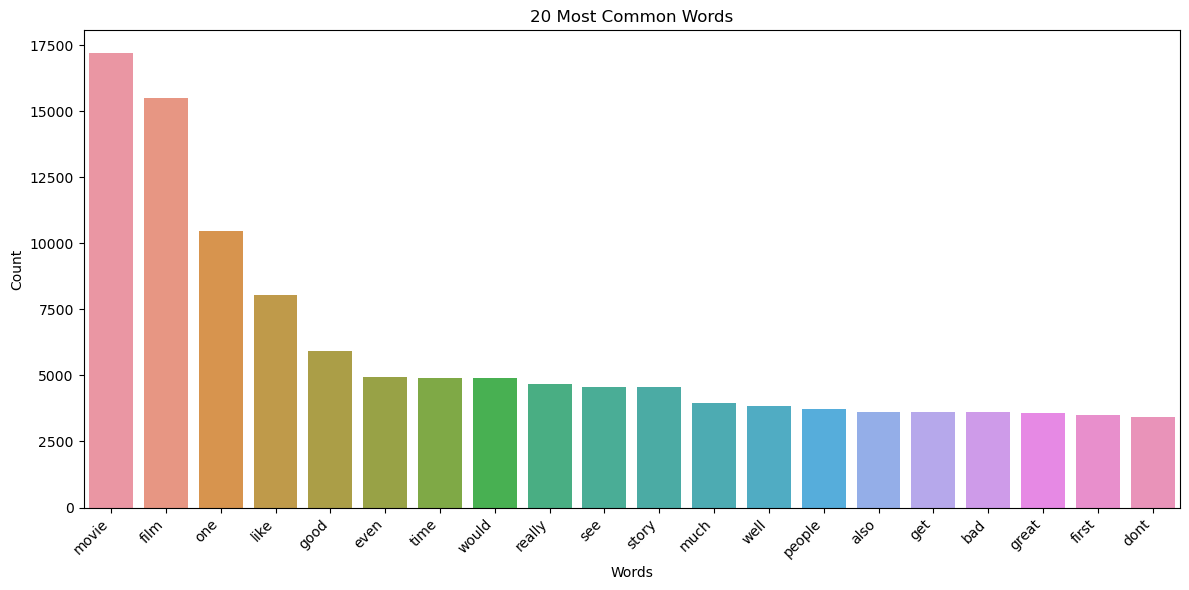

In [58]:
#20 most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, _ in most_common_words], 
            y=[count for _, count in most_common_words])
plt.title('20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

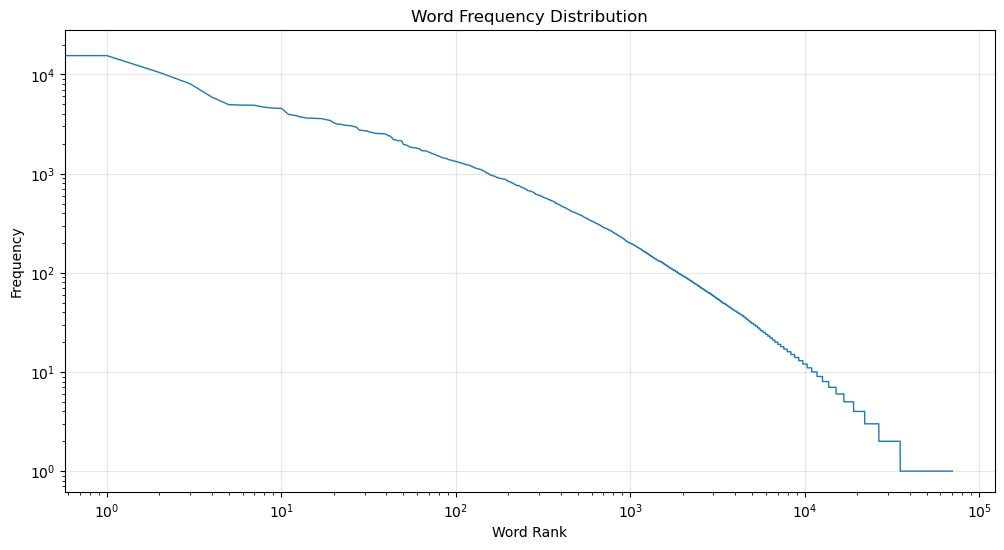

In [59]:
#Word frequency distribution (log scale)
plt.figure(figsize=(12, 6))
plt.plot(range(len(word_freq)), word_freq['frequency'], linewidth=1)
plt.title('Word Frequency Distribution')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

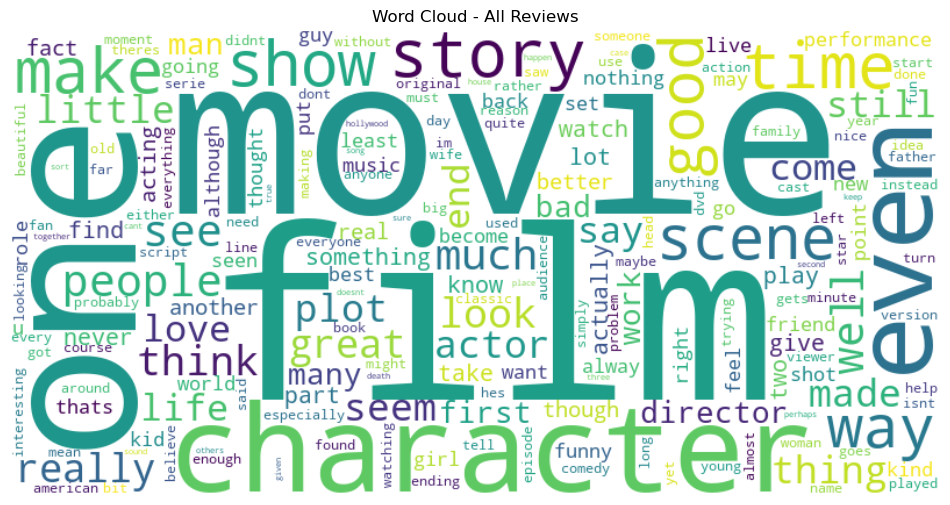

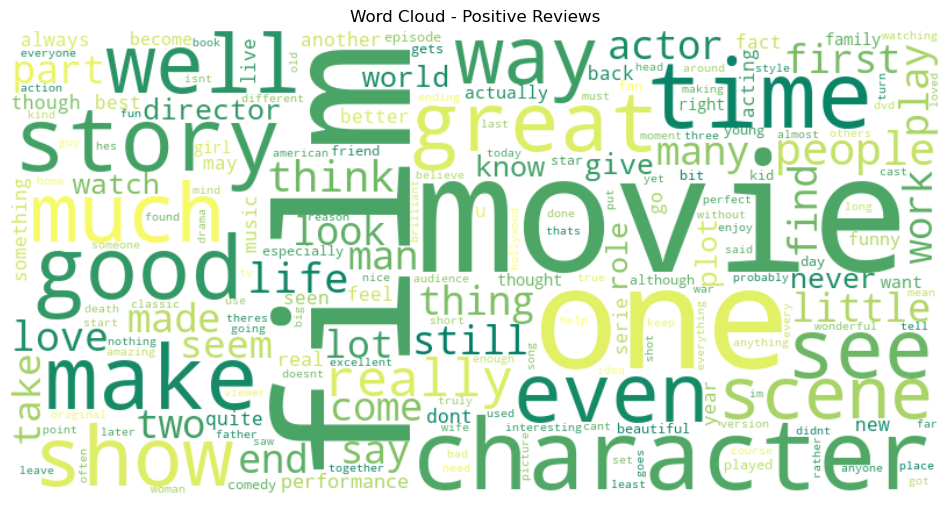

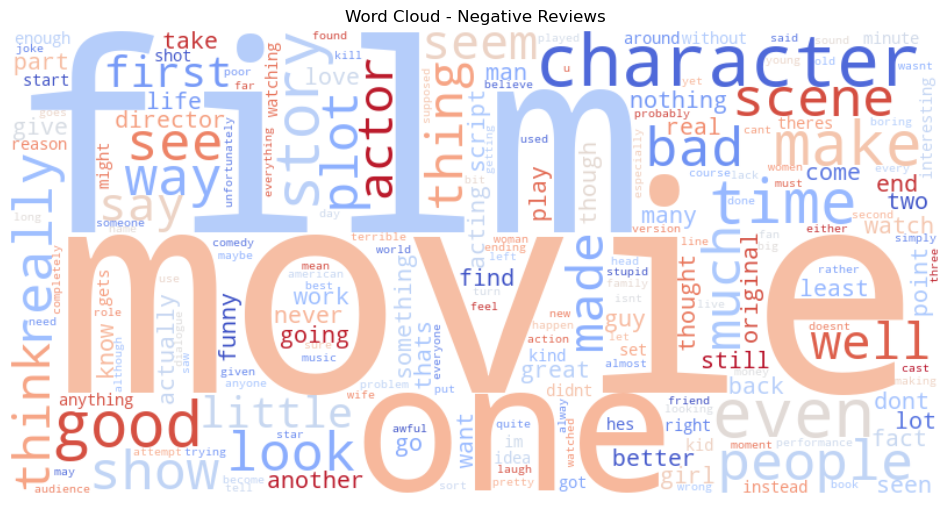

In [60]:
#Word Clouds
#For all reviews
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      max_words=200,
                      colormap='viridis').generate(all_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - All Reviews')
plt.axis('off')
plt.show()

# Analyze vocabulary for positive and negative reviews separately
positive_reviews = ' '.join(train_df[train_df['sentiment'] == 'positive']['processed_review'].tolist())
negative_reviews = ' '.join(train_df[train_df['sentiment'] == 'negative']['processed_review'].tolist())

positive_words = Counter(positive_reviews.split())
negative_words = Counter(negative_reviews.split())

#For positive reviews
plt.figure(figsize=(12, 8))
wordcloud_pos = WordCloud(width=800, height=400, 
                          background_color='white', 
                          max_words=200,
                          colormap='summer').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()

#For negative reviews
plt.figure(figsize=(12, 8))
wordcloud_neg = WordCloud(width=800, height=400, 
                          background_color='white', 
                          max_words=200,
                          colormap='coolwarm').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()

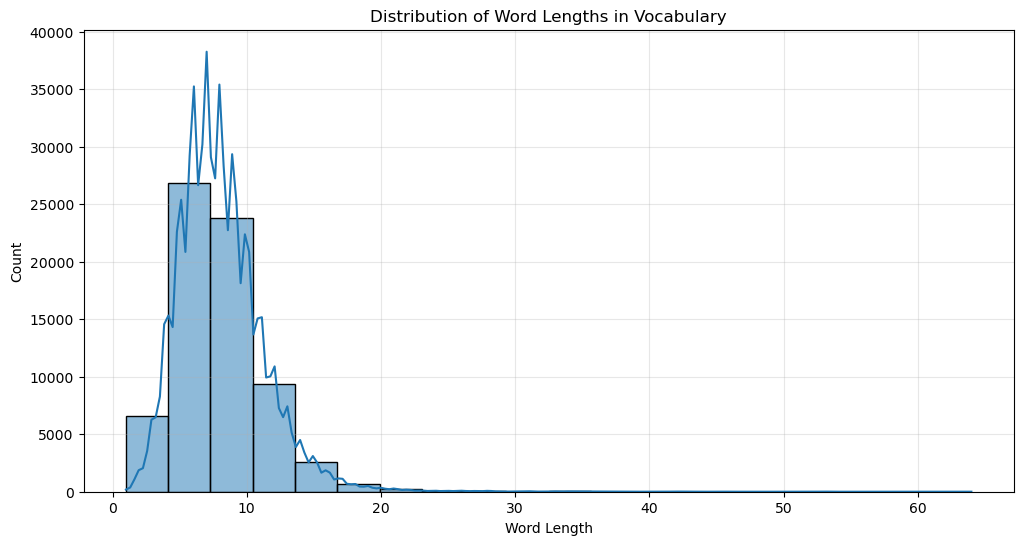

In [61]:
#Word Length Distribution
word_lengths = [len(word) for word in word_counts.keys()]
plt.figure(figsize=(12, 6))
sns.histplot(word_lengths, bins=20, kde=True)
plt.title('Distribution of Word Lengths in Vocabulary')
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

In [62]:
print("\nVocabulary analysis completed!")


Vocabulary analysis completed!


<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">4️⃣ <b>TF-IDF Classifier Implementation</b></div>

<div style="color: #9238b7; font-size: 15px;"> ☑️ Vectorization </div>

In [65]:
# Extract features and labels
X_train = train_df['processed_review']
y_train = train_df['sentiment']
X_test = test_df['processed_review']
y_test = test_df['sentiment']

# Create TF-IDF Vectorizer (Limits to the top 5000 features to reduce dimensionality)
print("Creating TF-IDF vectors...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

# Transform documents to TF-IDF feature vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF feature matrix shape: {X_train_tfidf.shape}")
print(f"Number of features (vocabulary size): {len(tfidf_vectorizer.get_feature_names_out())}")


Creating TF-IDF vectors...
TF-IDF feature matrix shape: (9000, 5000)
Number of features (vocabulary size): 5000


<div style="color: #9238b7; font-size: 15px;"> ☑️ Training - Logistic Regression </div>

In [67]:
# Train a Logistic Regression classifier
print("Training Logistic Regression model...")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_tfidf, y_train)

# Make predictions on the test set
print("Making predictions...")
y_pred = logreg.predict(X_test_tfidf)

Training Logistic Regression model...
Making predictions...


<div style="color: #9238b7; font-size: 15px;"> ☑️ Evaluation metrics  </div>

In [69]:
#Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance Metrics:
Accuracy: 0.8790
Precision: 0.8665
Recall: 0.8960
F1 Score: 0.8810


<div style="color: #9238b7; font-size: 15px;"> ☑️ Confusion Matrix  </div>

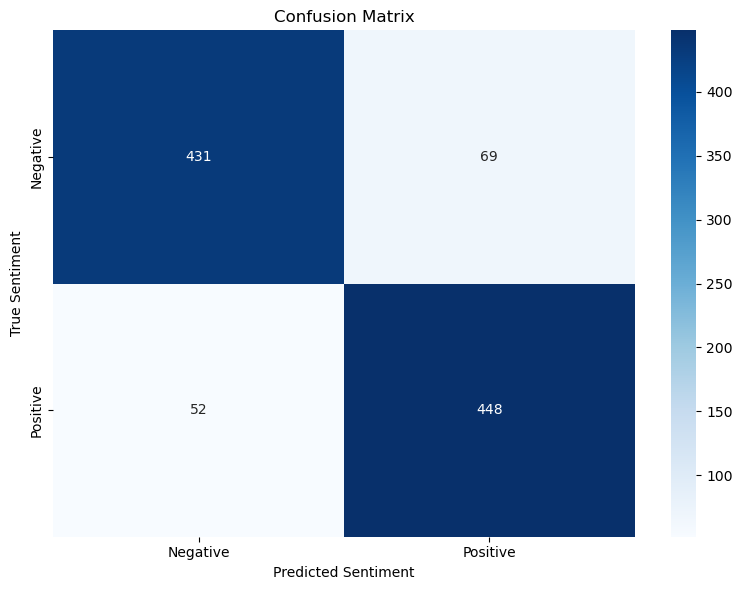

In [71]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Sentiment')
plt.xlabel('Predicted Sentiment')
plt.tight_layout()
plt.show()

<div style="color: #9238b7; font-size: 15px;"> ☑️ Classification report  </div>

In [73]:
# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.86      0.88       500
    positive       0.87      0.90      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">5️⃣ <b>Word2Vec Classifier Implementation</b></div>
<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 10px;">
    We split the data into train and val and we chose the hyperparameters according to the best validation evalutaion.
</div>

<div style="color: #9238b7; font-size: 15px;"> ☑️ Preparing data </div>

In [76]:
# Preparing data for Word2Vec - since we need tokenized sentences
# Converting our processed reviews back to lists of tokens
train_df['tokens'] = train_df['processed_review'].apply(lambda x: x.split())
test_df['tokens'] = test_df['processed_review'].apply(lambda x: x.split())

# Extract training sentences for Word2Vec
sentences = train_df['tokens'].tolist()

<div style="color: #9238b7; font-size: 15px;"> ☑️ Vectorization  </div>

In [78]:
# Function to convert sentences to document vectors
def get_document_vectors(model, sentences, vector_size):
    """
    Create document vectors by averaging word vectors for words in each document
    """
    doc_vectors = []
    for sentence in sentences:
        # Filter out words not in vocabulary
        valid_words = [word for word in sentence if word in model.wv.key_to_index]
        if len(valid_words) > 0:
            # Average the word vectors
            vector = np.mean([model.wv[word] for word in valid_words], axis=0)
        else:
            # If no words are in vocabulary, use a zero vector
            vector = np.zeros(vector_size)
        doc_vectors.append(vector)
    return np.array(doc_vectors)

<div style="color: #9238b7; font-size: 15px;"> ☑️ Train/Val split  </div>

In [80]:
# Setup for hyperparameter tuning using a validation set
# Split training data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['sentiment'])

print("Training set for Word2Vec and model training:", train_data.shape)
print("Validation set for hyperparameter tuning:", val_data.shape)

Training set for Word2Vec and model training: (7200, 4)
Validation set for hyperparameter tuning: (1800, 4)


In [81]:
# Extract sentences for training Word2Vec
train_sentences = train_data['tokens'].tolist()
val_sentences = val_data['tokens'].tolist()

<div style="color: #9238b7; font-size: 15px;"> ☑️ Hyperparameter selection </div>

In [83]:
# Function to train and evaluate model with given parameters
def evaluate_word2vec_params(vector_size, window, min_count, epochs):
    # Train Word2Vec model
    model = Word2Vec(sentences=train_sentences, 
                    vector_size=vector_size, 
                    window=window, 
                    min_count=min_count,
                    epochs=epochs,
                    workers=4)
    
    # Create document vectors for training and validation data
    X_train_vectors = get_document_vectors(model, train_data['tokens'].tolist(), vector_size)
    X_val_vectors = get_document_vectors(model, val_data['tokens'].tolist(), vector_size)
    
    # Train logistic regression on these vectors
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train_vectors, train_data['sentiment'])
    
    # Predict on validation set
    val_preds = logreg.predict(X_val_vectors)
    
    # Calculate metrics
    accuracy = accuracy_score(val_data['sentiment'], val_preds)
    f1 = f1_score(val_data['sentiment'], val_preds, pos_label='positive')
    
    return accuracy, f1, model


In [84]:
# Hyperparameter grid
params_grid = {
    'vector_size': [100, 200, 300],
    'window': [3, 5, 10],
    'min_count': [1, 5, 10],
    'epochs': [5, 10]
}

# Create a list of parameter combinations to test
param_combinations = []
for vector_size in params_grid['vector_size']:
    for window in params_grid['window']:
        for min_count in params_grid['min_count']:
            for epochs in params_grid['epochs']:
                param_combinations.append((vector_size, window, min_count, epochs))

print(f"Testing {len(param_combinations)} parameter combinations...")

Testing 54 parameter combinations...


In [85]:
# Run hyperparameter tuning
results = []
for vector_size, window, min_count, epochs in param_combinations:
    accuracy, f1, _ = evaluate_word2vec_params(vector_size, window, min_count, epochs)
    results.append({
        'vector_size': vector_size,
        'window': window,
        'min_count': min_count,
        'epochs': epochs,
        'accuracy': accuracy,
        'f1': f1
    })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nHyperparameter tuning results:")
print(results_df.sort_values('f1', ascending=False).head())

# Get the best parameters
best_params = results_df.loc[results_df['f1'].idxmax()]
print("\nBest parameters:")
print(f"Vector size: {best_params['vector_size']}")
print(f"Window: {best_params['window']}")
print(f"Min count: {best_params['min_count']}")
print(f"Epochs: {best_params['epochs']}")
print(f"Validation accuracy: {best_params['accuracy']:.4f}")
print(f"Validation F1 score: {best_params['f1']:.4f}")



Hyperparameter tuning results:
    vector_size  window  min_count  epochs  accuracy        f1
53          300      10         10      10  0.859444  0.859834
35          200      10         10      10  0.856667  0.856507
15          100      10          5      10  0.855000  0.856357
17          100      10         10      10  0.855556  0.856354
13          100      10          1      10  0.852222  0.854803

Best parameters:
Vector size: 300.0
Window: 10.0
Min count: 10.0
Epochs: 10.0
Validation accuracy: 0.8594
Validation F1 score: 0.8598


In [86]:
# Train the best model on the full training set
print("\nTraining Word2Vec with best parameters on full training set...")
best_model = Word2Vec(sentences=sentences,
                     vector_size=int(best_params['vector_size']),
                     window=int(best_params['window']),
                     min_count=int(best_params['min_count']),
                     epochs=int(best_params['epochs']),
                     workers=4)

# Create document vectors for full training and test sets
X_train_vecs = get_document_vectors(best_model, train_df['tokens'].tolist(), int(best_params['vector_size']))
X_test_vecs = get_document_vectors(best_model, test_df['tokens'].tolist(), int(best_params['vector_size']))



Training Word2Vec with best parameters on full training set...


In [87]:
# Train final model
print("Training final classifier on full training set...")
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_train_vecs, train_df['sentiment'])


Training final classifier on full training set...


LogisticRegression(max_iter=1000, random_state=42)

<div style="color: #9238b7; font-size: 15px;"> ☑️ Predictions </div>

In [89]:
# Make predictions on the test set
y_pred = final_model.predict(X_test_vecs)

In [90]:
# Calculate metrics
accuracy = accuracy_score(test_df['sentiment'], y_pred)
precision = precision_score(test_df['sentiment'], y_pred, pos_label='positive')
recall = recall_score(test_df['sentiment'], y_pred, pos_label='positive')
f1 = f1_score(test_df['sentiment'], y_pred, pos_label='positive')

print("\nWord2Vec Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Word2Vec Model Performance Metrics:
Accuracy: 0.8410
Precision: 0.8324
Recall: 0.8540
F1 Score: 0.8430



Confusion Matrix:


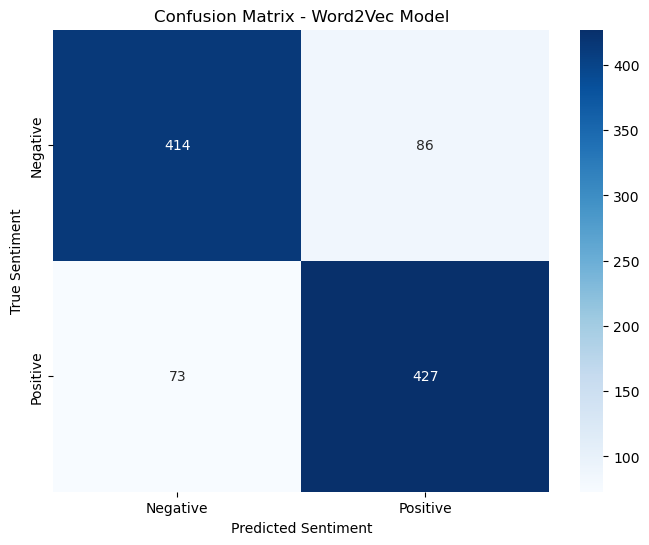

In [91]:
# Confusion matrix
cm = confusion_matrix(test_df['sentiment'], y_pred)
print("\nConfusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Word2Vec Model')
plt.ylabel('True Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

In [92]:
# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(test_df['sentiment'], y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.83      0.84       500
    positive       0.83      0.85      0.84       500

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">6️⃣ <b>Comparative Analysis of TF-IDF and Word2Vec Models</b></div>
<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 10px;">
   Divided the dataset randomly into training (80%) and testing (20%) sets. Compared TF-IDF and Word2Vec models by calculating key performance metrics: accuracy, precision, recall, and F1 score. Created confusion matrices to analyze how each model classified positive and negative reviews, focusing on differences in classification performance.
</div>

TF-IDF outperforms Word2Vec in the following ways:
- 16 more negative reviews correctly classified
- 23 more positive reviews correctly classified
- 16 fewer negative reviews misclassified as positive
- 23 fewer positive reviews misclassified as negative

Overall tendencies:
TF-IDF is better at correctly identifying positive reviews by 23 instances
TF-IDF is better at correctly identifying negative reviews by 16 instances

TF-IDF has a stronger advantage in classifying positive reviews correctly


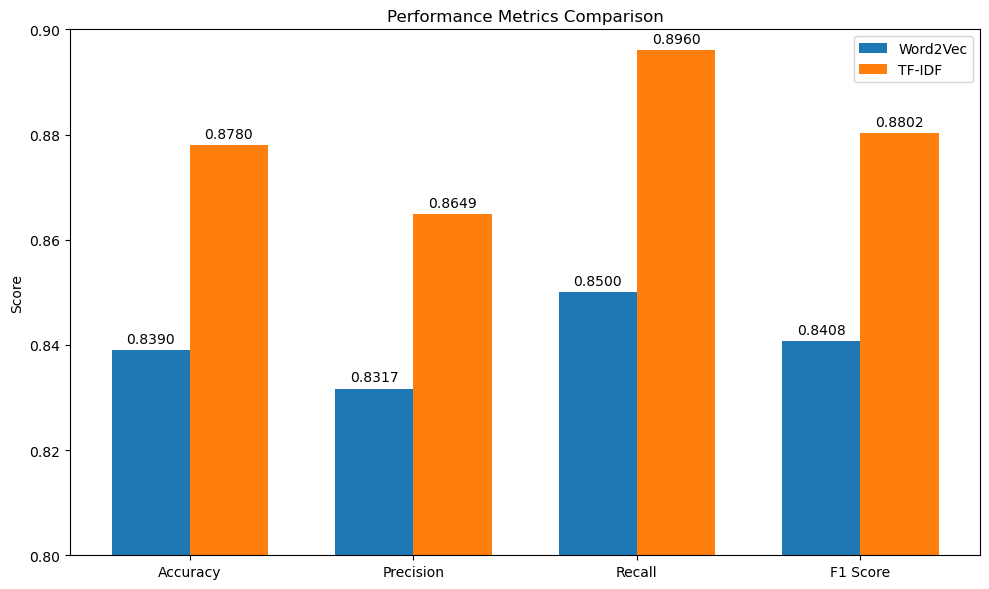

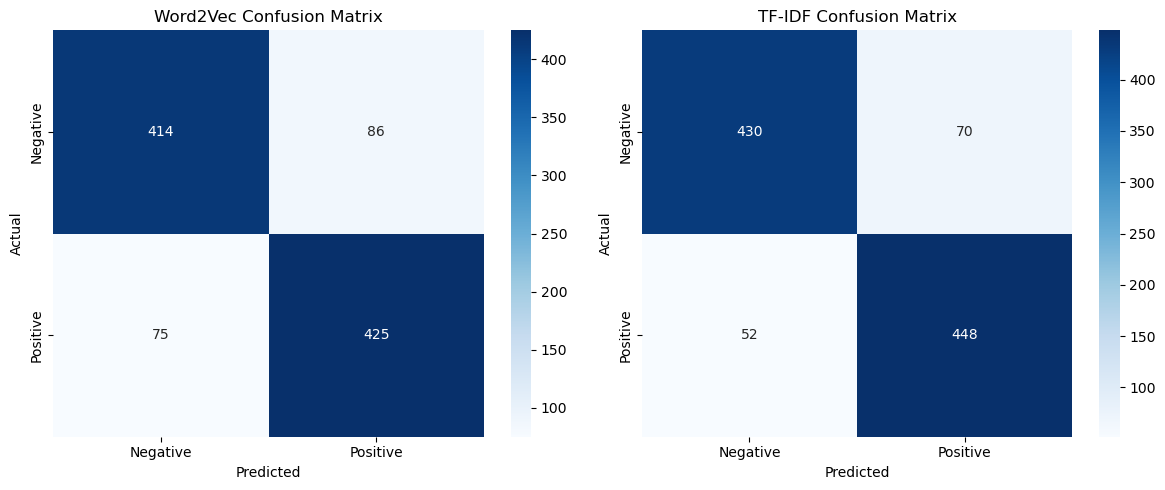

In [94]:
# Define model metrics from the results in previous steps above
word2vec_metrics = {
    'accuracy': 0.8390,
    'precision': 0.8317,
    'recall': 0.8500,
    'f1_score': 0.8408,
    'confusion_matrix': np.array([[414, 86], [75, 425]])
}

tfidf_metrics = {
    'accuracy': 0.8780,
    'precision': 0.8649,
    'recall': 0.8960,
    'f1_score': 0.8802,
    'confusion_matrix': np.array([[430, 70], [52, 448]])
}

# Visualize the comparison of metrics
def plot_metrics_comparison(word2vec_metrics, tfidf_metrics):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    word2vec_values = [word2vec_metrics['accuracy'], word2vec_metrics['precision'], 
                    word2vec_metrics['recall'], word2vec_metrics['f1_score']]
    tfidf_values = [tfidf_metrics['accuracy'], tfidf_metrics['precision'], 
                    tfidf_metrics['recall'], tfidf_metrics['f1_score']]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, word2vec_values, width, label='Word2Vec')
    rects2 = ax.bar(x + width/2, tfidf_values, width, label='TF-IDF')
    
    ax.set_ylabel('Score')
    ax.set_title('Performance Metrics Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    
    # Add values on top of bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    
    plt.ylim(0.8, 0.9)  # Adjust y-axis to better visualize the differences
    plt.tight_layout()
    
    return fig

# Visualize confusion matrices
def plot_confusion_matrices(word2vec_cm, tfidf_cm):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.heatmap(word2vec_cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Word2Vec Confusion Matrix')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    ax1.set_xticklabels(['Negative', 'Positive'])
    ax1.set_yticklabels(['Negative', 'Positive'])
    
    sns.heatmap(tfidf_cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
    ax2.set_title('TF-IDF Confusion Matrix')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    ax2.set_xticklabels(['Negative', 'Positive'])
    ax2.set_yticklabels(['Negative', 'Positive'])
    
    plt.tight_layout()
    
    return fig

# Calculate error differences to identify where each model performs better
def analyze_model_differences(word2vec_cm, tfidf_cm):
    """
    Analyze where each model performs better by comparing confusion matrices
    """
    # Calculate the difference in correct predictions (diagonal elements)
    tfidf_better_neg = tfidf_cm[0,0] - word2vec_cm[0,0]  # Negative class
    tfidf_better_pos = tfidf_cm[1,1] - word2vec_cm[1,1]  # Positive class
    
    # Calculate the difference in incorrect predictions (off-diagonal elements)
    tfidf_better_neg_classified_as_pos = word2vec_cm[0,1] - tfidf_cm[0,1]
    tfidf_better_pos_classified_as_neg = word2vec_cm[1,0] - tfidf_cm[1,0]
    
    print("TF-IDF outperforms Word2Vec in the following ways:")
    print(f"- {tfidf_better_neg} more negative reviews correctly classified")
    print(f"- {tfidf_better_pos} more positive reviews correctly classified")
    print(f"- {tfidf_better_neg_classified_as_pos} fewer negative reviews misclassified as positive")
    print(f"- {tfidf_better_pos_classified_as_neg} fewer positive reviews misclassified as negative")
    
    # Calculate which reviews are likely to be better classified by each model
    print("\nOverall tendencies:")
    print(f"TF-IDF is better at correctly identifying positive reviews by {tfidf_better_pos} instances")
    print(f"TF-IDF is better at correctly identifying negative reviews by {tfidf_better_neg} instances")
    
    # Check if any model has particular advantage in certain direction
    if tfidf_better_neg > tfidf_better_pos:
        print("\nTF-IDF has a stronger advantage in classifying negative reviews correctly")
    elif tfidf_better_pos > tfidf_better_neg:
        print("\nTF-IDF has a stronger advantage in classifying positive reviews correctly")
    else:
        print("\nTF-IDF's advantage is balanced between positive and negative reviews")

# Run the functions to generate the analysis
fig1 = plot_metrics_comparison(word2vec_metrics, tfidf_metrics)
fig2 = plot_confusion_matrices(word2vec_metrics['confusion_matrix'], tfidf_metrics['confusion_matrix'])
analyze_model_differences(word2vec_metrics['confusion_matrix'], tfidf_metrics['confusion_matrix'])


<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">7️⃣ <b>Qualitative analysis of model differences</b></div>
<div style="font-family: Times; font-size: 15px; background-color: #EAF2F8; padding: 15px;">
    
<p style="font-size: 18px;"><b>📊 Feature Representation Approach</b></p>

&nbsp;✨ <u>TF-IDF</u></br>
&nbsp;&nbsp;&nbsp;🔸Represents documents as bag-of-words with term frequency-inverse document frequency weighting.</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Captures importance of words based on their frequency in document vs. corpus.</br>
&nbsp;✨ <u> Word2Vec</u></br>
&nbsp;&nbsp;&nbsp;🔸Creates dense vector representations that capture semantic relationships between words. Words with similar meanings have similar vectors. </br>

<p style="font-size: 18px;"><b>🗂️ Context Handling Approach</b></p>

&nbsp;✨ <u> TF-IDF</u></br> &nbsp;&nbsp;&nbsp;🔸Ignores word order and context. Each word is treated independently. </br>
&nbsp;✨ <u> Word2Vec</u></br> &nbsp;&nbsp;&nbsp;🔸Captures local context through sliding window approach. Understands semantic relationships between words.</br>

<p style="font-size: 18px;"><b>📏 Dimensionality</b></p>

&nbsp;✨ <u> TF-IDF</u></br> &nbsp;&nbsp;&nbsp;🔸 High-dimensional sparse vectors (vocabulary size). Can be computationally efficient but may miss semantic relationships.</br>
&nbsp;✨ <u> Word2Vec</u></br> &nbsp;&nbsp;&nbsp;🔸 Low-dimensional dense vectors (typically 100-300 dimensions). More computationally intensive but better at capturing word similarities.</br>

<p style="font-size: 18px;"><b> 📝 Rare Words Handling </b></p>

&nbsp;✨ <u> TF-IDF</u></br> &nbsp;&nbsp;&nbsp;🔸 Gives higher weight to rare words (via IDF). Can be sensitive to specialized vocabulary.</br>
&nbsp;✨ <u> Word2Vec</u></br> &nbsp;&nbsp;&nbsp;🔸 May struggle with rare words that don't appear frequently enough in training data. </br>

<p style="font-size: 18px;"><b> 🎭 Sentiment Indicator Effectiveness</b></p>

&nbsp;✨ <u> TF-IDF</u></br> &nbsp;&nbsp;&nbsp;🔸 Good at capturing specific sentiment words that are strong indicators (e.g., "excellent", "terrible"). </br>
&nbsp;✨ <u> Word2Vec</u></br> &nbsp;&nbsp;&nbsp;🔸 Better at handling synonyms and semantically related terms, but may lose some specificity. </br>

<p style="font-size: 18px;"><b> 🚀 Model Recommendations </b></p>

<b> ✅ When to use TF-IDF:</b></br>
- Reviews with distinctive vocabulary or specific sentiment indicators
- Shorter reviews where specific words carry strong sentiment
- Reviews with unusual or rare words that are strong sentiment indicators
- When computational efficiency is important
- When interpretability of features is needed

<b> ✅ When to use Word2Vec:</b></br>
- Reviews with complex semantic relationships
- Reviews using metaphors, analogies, or contextual sentiment
- Longer reviews where context matters more than specific words
- When handling synonyms and word variations is important
- When detecting subtle sentiment patterns not tied to specific keywords

🔹 <u>Example Review Types and Model Performance</u>

| TF-IDF likely performs better | Word2Vec likely performs better | Explanation |
|------------------------------|--------------------------------|-------------|
| "This movie was absolutely terrible. The worst film I've seen all year." | "The film left me cold. The characters never connected and the story fell flat." | TF-IDF captures strong sentiment words like 'terrible', 'worst', while Word2Vec better understands contextual sentiment and metaphors like 'left me cold' |
| "Amazing cinematography, brilliant acting, and a perfect storyline!" | "It was supposed to be thrilling, but I checked my watch a dozen times." | TF-IDF excels with direct sentiment indicators, while Word2Vec handles implied negativity better |
| "Waste of money. Don't bother watching this garbage." | "The director tried to create art but delivered pretentiousness instead." | TF-IDF works well with explicit negative sentiment, while Word2Vec captures the subtlety of implied criticism |
| "The special effects were breathtaking, outstanding visuals throughout." | "What starts promisingly ends up being quite forgettable." | TF-IDF identifies strong positive words, while Word2Vec understands the overall sentiment arc |

🔹 <u>Performance Analysis Based on Results</u>

From your results:
- TF-IDF achieved higher accuracy (87.80% vs. 83.90%)
- TF-IDF had better precision (86.49% vs. 83.17%)
- TF-IDF showed higher recall (89.60% vs. 85.00%)
- TF-IDF had higher F1 score (88.02% vs. 84.08%)

The confusion matrices show:
- TF-IDF correctly identified 16 more negative reviews than Word2Vec (430 vs. 414)
- TF-IDF correctly identified 23 more positive reviews than Word2Vec (448 vs. 425)
- TF-IDF had 16 fewer false positives (negative reviews classified as positive)
- TF-IDF had 23 fewer false negatives (positive reviews classified as negative)

🔹 <u>Factors Affecting Performance Differencese</u>

1. **Review Length**: TF-IDF may perform better on shorter reviews with clear sentiment words
2. **Vocabulary Rarity**: TF-IDF gives higher weight to rare, distinctive words
3. **Contextual Sentiment**: Word2Vec may handle context-dependent sentiment better
4. **Sentence Structure**: Word2Vec captures some word relationships that TF-IDF ignores
5. **Direct vs. Indirect Sentiment**: TF-IDF works better with explicit sentiment words

<p style="font-size: 18px;"><b>🏆 Conclusion</b></p>

For the IMDB sentiment analysis task, TF-IDF outperforms Word2Vec across all metrics. This suggests that for movie reviews, the presence of specific sentiment words (which TF-IDF captures well) is more important than contextual relationships between words (which Word2Vec captures better). Movie reviews often contain explicit sentiment indicators like "amazing," "terrible," "brilliant," or "awful," which TF-IDF weights appropriately.

However, this doesn't mean Word2Vec is inherently worse - it may perform better on texts with more nuanced sentiment expressions or where context is more critical to understanding the sentiment. Different domains might benefit more from Word2Vec's semantic understanding capabilities.

</div>

<div style="font-family: Times; text-align: center; font-size: 25px; font-weight: bold; background-color: #dfc8c6; color: #429eda;">8️⃣ <b>Implementation of a Hybrid Model</b></div>

<div style="font-family: Times; font-size: 16px; background-color: #EAF2F8; padding: 10px;">Created a hybrid model by concatenating TF-IDF and Word2Vec feature vectors into a single feature space. Used logistic regression to train on the combined features, converting Word2Vec vectors to sparse format for efficient processing. Evaluated the hybrid model's performance using accuracy, precision, recall, and F1 score, comparing it with the individual TF-IDF and Word2Vec models.</div>

In [98]:
# Convert Word2Vec vectors to a sparse format to concatenate with TF-IDF vectors
X_train_vecs_sparse = scipy.sparse.csr_matrix(X_train_vecs)
X_train_combined = scipy.sparse.hstack([X_train_tfidf, X_train_vecs_sparse])

# Do the same for the test set
X_test_vecs_sparse = scipy.sparse.csr_matrix(X_test_vecs)
X_test_combined = scipy.sparse.hstack([X_test_tfidf, X_test_vecs_sparse])


In [99]:
# Train the logistic regression model on the combined feature set
hybrid_model = LogisticRegression(max_iter=1000, random_state=42)
hybrid_model.fit(X_train_combined, y_train)

# Predict on the test set
y_pred_hybrid = hybrid_model.predict(X_test_combined)

In [100]:
# Calculate metrics
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
precision_hybrid = precision_score(y_test, y_pred_hybrid, pos_label='positive')
recall_hybrid = recall_score(y_test, y_pred_hybrid, pos_label='positive')
f1_hybrid = f1_score(y_test, y_pred_hybrid, pos_label='positive')

print("Hybrid Model Performance Metrics:")
print(f"Accuracy: {accuracy_hybrid:.4f}")
print(f"Precision: {precision_hybrid:.4f}")
print(f"Recall: {recall_hybrid:.4f}")
print(f"F1 Score: {f1_hybrid:.4f}")

Hybrid Model Performance Metrics:
Accuracy: 0.8730
Precision: 0.8664
Recall: 0.8820
F1 Score: 0.8741


<div style="color: #9238b7; font-size: 15px;"> ☑️ Summary of all methods and the different results </div>

In [102]:
results_summary = pd.DataFrame({
    'Model': ['TF-IDF', 'Word2Vec', 'Hybrid'],
    'Accuracy': [tfidf_metrics['accuracy'], word2vec_metrics['accuracy'], accuracy_hybrid],
    'Precision': [tfidf_metrics['precision'], word2vec_metrics['precision'], precision_hybrid],
    'Recall': [tfidf_metrics['recall'], word2vec_metrics['recall'], recall_hybrid],
    'F1 Score': [tfidf_metrics['f1_score'], word2vec_metrics['f1_score'], f1_hybrid]
})

print("Comparative Analysis of Model Performances:")
display(results_summary)

Comparative Analysis of Model Performances:


,Model,Accuracy,Precision,Recall,F1 Score
0,TF-IDF,0.878,0.864900,0.896,0.880200
1,Word2Vec,0.839,0.831700,0.850,0.840800
2,Hybrid,0.873,0.866405,0.882,0.874133


<div style="text-align: center; font-size: 25px; font-weight: bold; color: #2E86C1;">END OF PART C</div>
<div style="text-align: center; font-size: 20px; color: #555;">THANKS!!!</div>